In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [2]:
housing = datasets.load_boston()

In [3]:
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df.head()
y = housing.target

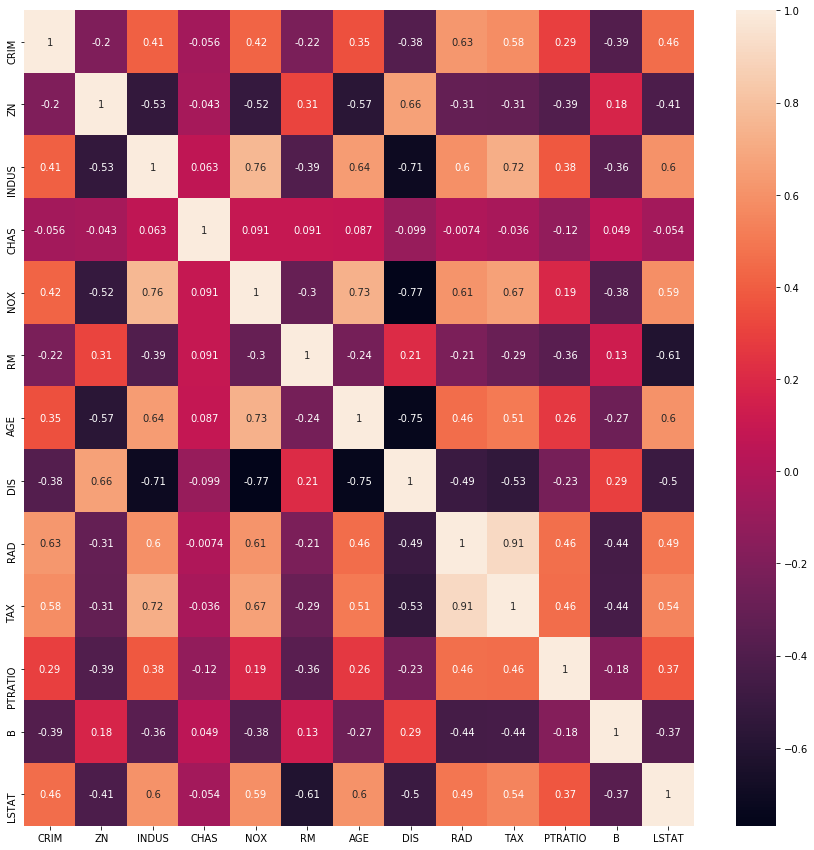

In [4]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True)

(array([  3.,   8.,  13.,  23.,  63., 100., 172.,  52.,  40.,  32.]),
 array([1.60943791, 1.83969642, 2.06995493, 2.30021344, 2.53047195,
        2.76073046, 2.99098897, 3.22124748, 3.45150599, 3.6817645 ,
        3.91202301]),
 <a list of 10 Patch objects>)

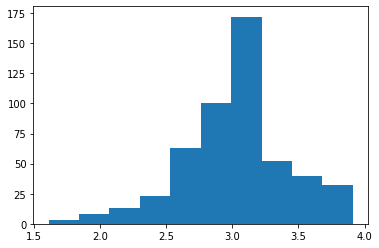

In [5]:
plt.hist(np.log(housing.target))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=1)

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
model = Pipeline([("scalar", PolynomialFeatures(2)),
                 ("estimator", LinearRegression())])

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = model.predict(X_test)

In [11]:
mean_squared_error(y_test, y_pred)

19.831323672063235

In [12]:
from sklearn.linear_model import Lasso

In [19]:
modelL1 = Lasso(alpha=0.01)
modelL1 = Pipeline([("scalar", PolynomialFeatures(2)),
                 ("estimator", Lasso(alpha=0.1, max_iter=1000000))])

In [20]:
modelL1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scalar',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('estimator',
                 Lasso(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=1000000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [21]:
y_predL1 = modelL1.predict(X_test)

In [22]:
mean_squared_error(y_test, y_predL1)

12.403220859204543

In [23]:
from sklearn.linear_model import Ridge

In [24]:
modelL2 = Ridge(alpha=1)

In [25]:
modelL2.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [26]:
y_predL2 = modelL2.predict(X_test)

In [27]:
mean_squared_error(y_test, y_predL2)

19.334416287843638

In [28]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [29]:
X_new = f_regression(X_train, y_train)

In [30]:
X_new

(array([ 69.01654792,  61.25921722, 102.65415593,  12.31142754,
         90.7184307 , 256.84999263,  78.2067307 ,  33.60894478,
         56.3573271 ,  83.54137382, 122.41341575,  41.17942398,
        424.6109872 ]),
 array([2.13718095e-15, 5.92161997e-14, 2.43795809e-21, 5.08593156e-04,
        2.76051410e-19, 8.54683456e-44, 4.54507307e-17, 1.49901884e-08,
        5.00563753e-13, 5.06093808e-18, 1.27922966e-24, 4.48667939e-10,
        1.87993425e-62]))

In [31]:
ftrs = (X_new[0] > 100).nonzero()

In [123]:
toTake = ['LSTAT','PTRATIO','RM','INDUS','TAX']# housing.feature_names[ftrs]

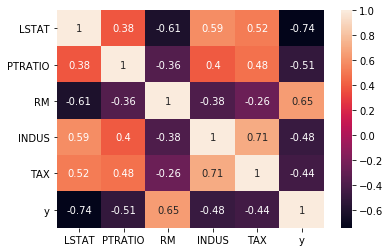

In [124]:
XX = X_train[toTake].copy()
XX['y']=y_train
sns.heatmap(XX.corr(),annot=True)

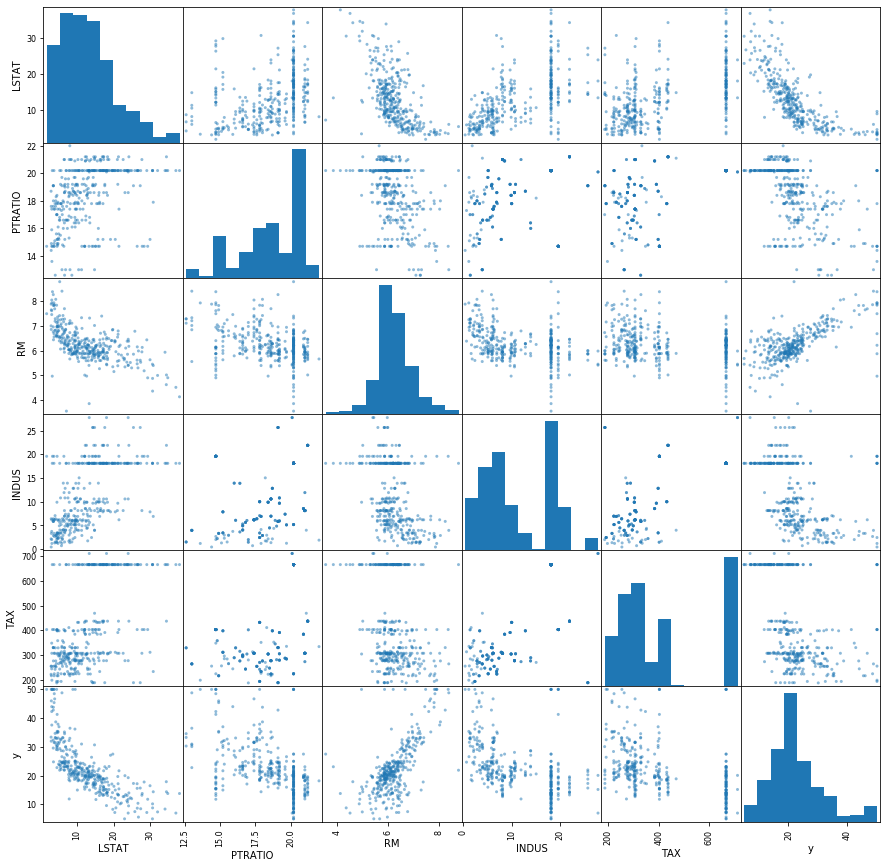

In [125]:
scatter = pd.plotting.scatter_matrix(XX, alpha=0.5, figsize = (15,15))

In [126]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [127]:
modelClass = make_pipeline(PolynomialFeatures(3), LinearRegression())
modelClass.fit(XX[toTake], XX['y'])
y_predClass = modelClass.predict(X_test[toTake])
mean_squared_error(y_test, y_predClass)

10.339567442687784

In [140]:
model2 = make_pipeline(PolynomialFeatures(3), Lasso(alpha=0.01, max_iter=400000, tol=0.01))

In [148]:
XX2 = X_train[toTake].copy()
XX2['LSTAT_LOG'] = np.log(XX2['LSTAT']) 
XX2.drop(['LSTAT'], axis=1, inplace=True)

In [149]:
model2.fit(XX2, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1934.4645782987766, tolerance: 287.4092838983051
  positive)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=400000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.01, warm_start=False))],
         verbose=False)

In [150]:
XX2test = X_test[toTake].copy()

In [151]:
XX2test['LSTAT_LOG'] = np.log(XX2test['LSTAT'])
XX2test.drop(['LSTAT'], axis=1, inplace=True)

In [152]:
y_pred2 = model2.predict(XX2test)

In [153]:
mean_squared_error(y_test, y_pred2)

8.562936899536286

In [154]:
r2_score(y_pred2, y_test)

0.8957075995158348

In [136]:
residuals = y_test - y_pred2

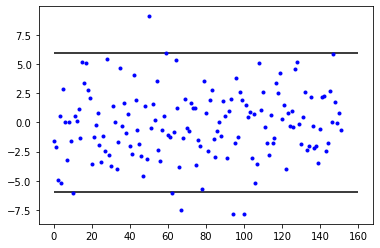

In [137]:
plt.plot(residuals, "b.")
plt.hlines(-6, 0, 160)
plt.hlines(6, 0, 160)

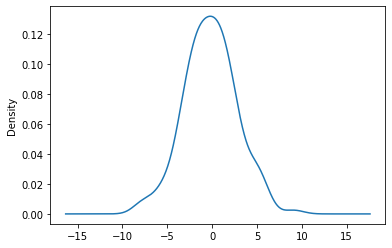

In [138]:
from pandas import DataFrame
df = DataFrame(residuals)
df.plot(kind='kde', legend = False) 

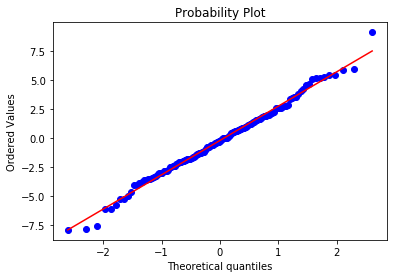

In [139]:
import scipy
residulas1dim = residuals[:]
qq = scipy.stats.probplot(residulas1dim, dist="norm", plot=plt)